In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import log2
from sklearn import tree # you'll probably need to install this - look at Q6 for a link
import graphviz # you'll probably need to install this - look at Q6 for a link
import seaborn as sns
sns.set_style('darkgrid')

#### Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# load data

In [3]:
df_train = pd.read_csv('https://gist.githubusercontent.com/yanyanzheng96/f8ba57f8377dee0810271475c728fca8/raw/afa3fa4305b55e31135980835d40b27af31f288c/melb_tree_train.csv')
df_train.head()

,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea
0,2,t,771000.0,13.8,2.0,1.0,1.0,0.0,99.0,1992.0,Bayside
1,3,t,700000.0,7.9,3.0,2.0,1.0,189.0,110.0,1990.0,Banyule
2,3,u,975000.0,12.1,3.0,2.0,1.0,277.0,109.0,1975.0,Glen Eira
3,3,h,1290000.0,8.0,3.0,1.0,1.0,618.0,132.0,1960.0,Moonee Valley
4,2,u,500000.0,4.2,2.0,1.0,1.0,0.0,86.0,2000.0,Melbourne


In [4]:
df_test = pd.read_csv('https://gist.githubusercontent.com/yanyanzheng96/ec66da011b165f0e282c0c1f8447010e/raw/d02c3829a7e9db2d156ba1ab9d5bb4d18ae57be8/melb_tree_test.csv')
df_test.head()

,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea
0,2,t,930000.0,2.6,2.0,1.0,1.0,97.0,85.0,2004.0,Yarra
1,3,t,815000.0,11.0,3.0,2.0,2.0,159.0,130.0,2014.0,Hobsons Bay
2,4,h,638000.0,13.0,4.0,2.0,1.0,624.0,258.0,2005.0,Moreland
3,2,t,595000.0,11.2,2.0,2.0,1.0,201.0,111.0,2005.0,Moreland
4,3,t,620500.0,11.2,3.0,2.0,1.0,158.0,117.0,2011.0,Darebin


# Q1. Explore the distribution of the target column "Type" in the training data

Q 1.1 use value_counts to get the statistics of Type label

In [5]:
df_train['Type'].value_counts()

t    281
u    281
h    248
Name: Type, dtype: int64

Q 1.2 calculate the frequency of type t, type u and type h

In [6]:
#hint : print( len() / len() )
print("Frequency of type t:", (sum(df_train['Type'] == 't') / len(df_train['Type'])))
print("Frequency of type u:", (sum(df_train['Type'] == 'u') / len(df_train['Type'])))
print("Frequency of type h:", (sum(df_train['Type'] == 'h') / len(df_train['Type'])))

Frequency of type t: 0.3469135802469136
Frequency of type u: 0.3469135802469136
Frequency of type h: 0.30617283950617286


# Q2. feature preprocessing

Q2.1 use a subset of features, extract the feature columns saved as df_features, extract the target columns saved as df_targets

In [7]:
df_train.head()

,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea
0,2,t,771000.0,13.8,2.0,1.0,1.0,0.0,99.0,1992.0,Bayside
1,3,t,700000.0,7.9,3.0,2.0,1.0,189.0,110.0,1990.0,Banyule
2,3,u,975000.0,12.1,3.0,2.0,1.0,277.0,109.0,1975.0,Glen Eira
3,3,h,1290000.0,8.0,3.0,1.0,1.0,618.0,132.0,1960.0,Moonee Valley
4,2,u,500000.0,4.2,2.0,1.0,1.0,0.0,86.0,2000.0,Melbourne


In [8]:
features = ['Rooms',
            'Price',
            'Distance',
            'Bedroom2',
            'Bathroom',
            'Car',
            'Landsize',
            'BuildingArea',
            'YearBuilt',
            'CouncilArea'
           ]

target = 'Type'

df_features = df_train[features]
df_target = df_train[target]

In [9]:
print(df_features.columns[0], df_features.dtypes[0])
df_features.dtypes

Rooms int64


Rooms             int64
Price           float64
Distance        float64
Bedroom2        float64
Bathroom        float64
Car             float64
Landsize        float64
BuildingArea    float64
YearBuilt       float64
CouncilArea      object
dtype: object

Q2.2 output the categorical data


In [10]:
categorical_variables = []
for feat_name, feat_type in zip(df_features.columns, df_features.dtypes):
    if feat_type == 'object':
        categorical_variables.append(feat_name)
    else:
        continue

for feature in categorical_variables:
    print(feature)

CouncilArea


# Q3. Build a decision tree classifier

Using [scikit-learn](https://scikit-learn.org/stable/modules/tree.html#tree) create a multi class classifer for the data set using the Gini impurity measure and a max depth of 3.

Note that scikit-learn's algorithm doesn't handle categorical data, so that needs to be preprocessed using an one hot encoding.


In [11]:
# Create Tree
df_X = pd.get_dummies(df_features[categorical_variables]) # one hot encoding for categorical data

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3) # specify 'hyperparameters' for a decision tree
clf = clf.fit(df_X, df_target) # fit feature dataframes df_X and target column s_y into the decision tree model for training to build the 'real nodes', i.e. 'parameters'

# Q4. Visualize the learned Model

Display graphviz version of the tree

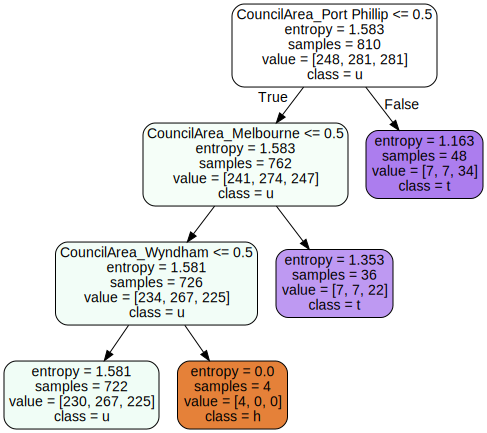

In [12]:
# Display graphviz version of the tree
graph_data = tree.export_graphviz(clf, out_file=None,
                                  feature_names=list(df_X.columns),
                                  class_names=list(set(df_target)),
                                   filled=True, rounded=True)
graph = graphviz.Source(graph_data, )
graph

# Q5. Making predictions

Q5.1 preprocess the test dataset
1. separate the features and target for test dataset
2. use dummy to get one hot encoding for categorical data

In [13]:
features = ['Rooms',
            'Price',
            'Distance',
            'Bedroom2',
            'Bathroom',
            'Car',
            'Landsize',
            'BuildingArea',
            'YearBuilt',
            'CouncilArea'
           ]

target = 'Type'

df_test_features = df_test[features]
df_test_target = df_test[target]

df_test_features = pd.get_dummies(df_test_features[categorical_variables])

Q5.2 extract one sample from the testing data and make the prediction, visualize the prediction path

In [14]:
# # Now, let's extract a random data instance from df_test
import random
random_instance_index = random.randint(0, len(df_test_features) - 1)
random_instance = df_test_features.iloc[random_instance_index, :]


# Visualize the prediction node path
node_indicator = clf.decision_path([random_instance])

# Get the indices of the nodes visited along the decision path
node_indices = node_indicator.indices

# Extract the node names and conditions for the decision path
decision_path_info = []
for node_index in node_indices:
    feature_index = clf.tree_.feature[node_index]
    threshold = clf.tree_.threshold[node_index]

    if random_instance.iloc[feature_index] <= threshold:
        condition = f"if {random_instance.index[feature_index]} <= {threshold:.2f}"
    else:
        condition = f"if {random_instance.index[feature_index]} > {threshold:.2f}"

    decision_path_info.append((node_index, random_instance.index[feature_index], condition))


# Print the extracted decision path information
for node_index, feature_name, condition in decision_path_info:
    print(f"Node {node_index}: {condition}")

Node 0: if CouncilArea_Port Phillip <= 0.50
Node 1: if CouncilArea_Melbourne <= 0.50
Node 2: if CouncilArea_Wyndham <= 0.50
Node 3: if CouncilArea_Wyndham > -2.00


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Q5.3 get the predicted result for whole test dataset

In [15]:
from sklearn.metrics import accuracy_score

predictions = clf.predict(df_test_features)
accuracy = accuracy_score(df_test_target, predictions)

print("Accuracy:", accuracy)

Accuracy: 0.38095238095238093
